Обучение без учителя: 4 метода кластеризации данных на Python

https://proglib.io/p/unsupervised-ml-with-python/?utm_referrer=https%3A%2F%2Fzen.yandex.com

Описаны четыре популярных метода обучения без учителя для кластеризации данных с соответствующими примерами программного кода на Python.

Обучение без учителя
Обучение без учителя (unsupervised learning, неконтролируемое обучение) – класс методов машинного обучения для поиска шаблонов в наборе данных. Данные, получаемые на вход таких алгоритмов обычно не размечены, то есть передаются только входные переменные X без соответствующих меток y. Если в контролируемом обучении (обучении с учителем, supervised learning) система пытается извлечь уроки из предыдущих примеров, то в обучении без учителя – система старается самостоятельно найти шаблоны непосредственно из приведенного примера.



На левой части изображения представлен пример контролируемого обучения: здесь для того, чтобы найти лучшую функцию, соответствующую представленным точкам, используется метод регрессии. В то же время при неконтролируемом обучении входные данные разделяются на основе представленных характеристик, а предсказание свойств основывается на том, какому кластеру принадлежит пример.

Методы кластеризации данных являются одним из наиболее популярных семейств машинного обучения без учителя. Рассмотрим некоторые из них подробнее.

Важная терминология
Feature (Особенности): входная переменная, используемая для создания прогнозов.
Predictions (Прогнозы): выходные данные модели при наличии входного примера.
Example (Пример): строка набора данных. Пример обычно содержит один или несколько объектов.
Label (Метки): результат функции.
Подготовка выборки для кластеризации данных
Для составления прогнозов воспользуемся классическим набором данных ирисов Фишера. Датасет представляет набор из 150 записей с пятью атрибутами в следующем порядке: длина чашелистика (sepal length), ширина чашелистика (sepal width), длина лепестка (petal length), ширина лепестка (petal width) и класс, соответствующий одному из трех видов: Iris Setosa, Iris Versicolor или Iris Virginica, обозначенных соответственно 0, 1, 2. Наш алгоритм должен принимать четыре свойства одного конкретного цветка и предсказывать, к какому классу (виду ириса) он принадлежит. Имеющиеся в наборе данных метки можно использовать для оценки качества предсказания.

Для решения задач кластеризации данных в этой статье мы используем Python, библиотеку scikit-learn для загрузки и обработки набора данных и matplotlib для визуализации. Ниже представлен программный код для исследования исходного набора данных.


['DESCR', 'data', 'feature_names', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


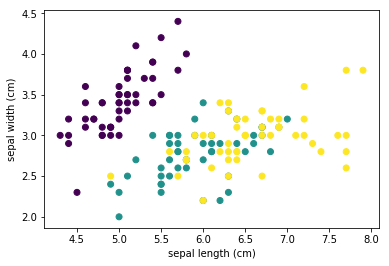

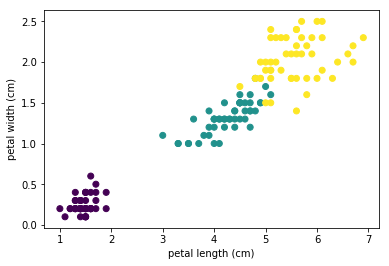

In [1]:
# Импортируем библиотеки
from sklearn import datasets
import matplotlib.pyplot as plt
 
# Загружаем набор данных
iris_df = datasets.load_iris()
 
# Методы, доступные для набора данных
print(dir(iris_df))
 
# Признаки
print(iris_df.feature_names)
 
# Метки
print(iris_df.target)
 
# Имена меток
print(iris_df.target_names)
 
# Разделение набора данных
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 1]  # Sepal Width
 
# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

--
# Разделение набора данных
x_axis = iris_df.data[:, 2]  # Sepal Length
y_axis = iris_df.data[:, 3]  # Sepal Width
 
# Построение
plt.xlabel(iris_df.feature_names[2])
plt.ylabel(iris_df.feature_names[3])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

In [15]:
#print(iris_df)
print(iris_df['data'])
print(iris_df['target'])
print(iris_df['target_names'])
print(iris_df['DESCR'])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

На диаграмме фиолетовым цветом обозначен вид Setosa, зеленым – Versicolor и желтым – Virginica. При построении были взяты лишь два признака. Вы можете проанализировать как разделяются классы при других комбинациях параметров.

Цель кластеризации данных состоит в том, чтобы выделить группы примеров с похожими чертами и определить соответствие примеров и кластеров. При этом исходно у нас нет примеров такого разбиения. Это аналогично тому, как если бы в приведенном наборе данных у нас не было меток, как на рисунке ниже.

Наша задача – используя все имеющиеся данные, предсказать соответствие объектов выборки их классам, сформировав таким образом кластеры.

Метод k-средних
Наиболее популярным алгоритмом кластеризации данных является метод k-средних. Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters равный трем.

Теперь случайным образом из входных данных выбираются три элемента выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

Далее ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек.  Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

In [2]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans
 
# Загружаем набор данных
iris_df = datasets.load_iris()
 
# Описываем модель
model = KMeans(n_clusters=3)
 
# Проводим моделирование
model.fit(iris_df.data)
 
# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
 
# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)
 
# Выводим предсказания
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


При выводе данных нужно понимать, что алгоритм не знает ничего о нумерации классов, и числа 0, 1, 2 – это лишь номера кластеров, определенных в результате работы алгоритма. Так как исходные точки выбираются случайным образом, вывод будет несколько меняться от одного запуска к другому.

Характерной особенностью набора данных ирисов Фишера является то, что один класс (Setosa) легко отделяется от двух остальных. Это заметно и в приведенном примере.

Иерархическая кластеризация
Иерархическая кластеризация, как следует из названия, представляет собой алгоритм, который строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два ближайших кластера объединяются в один и так далее, пока не будет образован один общий кластер.

Результат иерархической кластеризации может быть представлен с помощью дендрограммы. Рассмотрим этот тип кластеризации на примере данных для различных видов зерна.

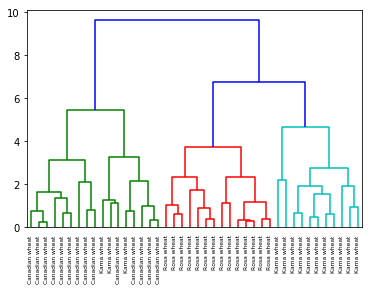

In [3]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
 
# Создаем датафрейм
seeds_df = pd.read_csv("https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")
 
# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
samples = seeds_df.values
 
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')
 
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )
 
plt.show()

In [9]:
mergings[:3]

array([[ 33.        ,  36.        ,   0.27162909,   2.        ],
       [ 21.        ,  26.        ,   0.31365739,   2.        ],
       [ 18.        ,  43.        ,   0.32846589,   3.        ]])

In [10]:
samples[:3]

array([[ 14.88  ,  14.57  ,   0.8811,   5.554 ,   3.333 ,   1.018 ,   4.956 ],
       [ 14.69  ,  14.49  ,   0.8799,   5.563 ,   3.259 ,   3.586 ,   5.219 ],
       [ 14.03  ,  14.16  ,   0.8796,   5.438 ,   3.201 ,   1.717 ,   5.001 ]])

Можно видеть, что в результате иерархической кластеризации данных естественным образом произошло разбиение на три кластера, обозначенных на рисунке различным цветом. При этом исходно число кластеров не задавалось.

Сравнение метода k-средних с иерархической кластеризацией данных
Иерархическая кластеризация хуже подходит для кластеризации больших объемов данных в сравнении с методом k-средних. Это объясняется тем, что временная сложность алгоритма линейна для метода k-средних (O(n)) и квадратична для метода иерархической кластеризации (O(n2))
В кластеризации при помощи метода k-средних алгоритм начинает построение с произвольного выбора начальных точек, поэтому, результаты, генерируемые при многократном запуске алгоритма, могут отличаться. В то же время в случае иерархической кластеризации результаты воспроизводимы.
Из центроидной геометрии построения метода k-средних следует, что метод хорошо работает, когда форма кластеров является гиперсферической (например, круг в 2D или сфера в 3D).
Метод k-средних более чувствителен к зашумленным данным, чем иерархический метод.

Понижение размерности с методом t-SNE
Метод t-SNE (t-distributed stochastic neighbor embedding) представляет собой один из методов обучения без учителя, используемых для визуализации, например, отображения пространства высокой размерности в двух- или трехмерное пространство. t-SNE расшифровывается как распределенное стохастическое соседнее вложение.

Метод моделирует каждый объект пространства высокой размерности в двух- или трехкоординатную точку таким образом, что близкие по характеристикам элементы данных в многомерном пространстве (например, датасете с большим числом столбцов) проецируются в соседние точки, а разнородные объекты с большей вероятностью моделируются точками, далеко отстоящими друг от друга. Математическое описание работы метода можно найти здесь.

Вернемся к примеру с ирисами и посмотрим, как произвести моделирование по этому методу при помощи библиотеки sklearn.

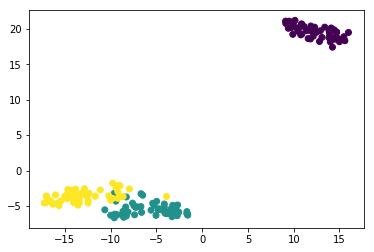

In [32]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
 
# Загрузка датасета
iris_df = datasets.load_iris()
 
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)
 
# Обучаем модель
transformed = model.fit_transform(iris_df.data)
 
# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

В этом случае каждый экземпляр представлен четырьмя координатами – таким образом, при отображении признаков на плоскость размерность пространства понижается с четырех до двух.

Метод кластеризации на основе плотности DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума) – популярный алгоритм кластеризации, используемый в анализе данных в качестве одной из замен метода k-средних.

Метод не требует предварительных предположений о числе кластеров, но нужно настроить два других параметра: eps и min_samples. Данные параметры – это соответственно максимальное расстояние между соседними точками и минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер. В scikit-learn есть соответствующие значения параметров по умолчанию, но, как правило, их приходится настраивать самостоятельно.

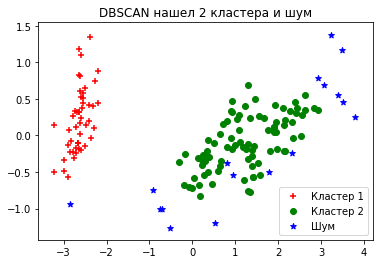

In [33]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
 
# Загружаем датасет
iris = load_iris()
 
# Определяем модель
dbscan = DBSCAN()
 
# Обучаем
dbscan.fit(iris.data)
 
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
 
# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
 
plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()